In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score
from sklearn.pipeline import make_pipeline

In [ ]:
# Preprocess the data
file_path = r'c:\Users\charlie\Desktop\ML Final\dataset.csv'
dataframe = pd.read_csv(file_path)
# Check for null values
# print(dataframe.isnull().sum()*100/dataframe.shape[0])

# Convert 'Date' column to datetime and extract month and year
dataframe['Date'] = pd.to_datetime(dataframe['Date'])
dataframe['Month'] = dataframe['Date'].dt.month
dataframe['Year'] = dataframe['Date'].dt.year
dataframe = dataframe.drop(columns=['Date'])

# Map 'Year' to a number representing the order
dataframe['Year'] = dataframe['Year'] - dataframe['Year'].min()

# Split training and test data
X = dataframe.drop(columns=['SPX'])
y = dataframe['SPX']

X_train, X_val, y_train, y_val = train_test_split(
    X,
    y,
    train_size=0.7,
    test_size=0.3,
    random_state=100
)

# Apply scaler() to all the columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Accuracy

In [ ]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    # 'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model accuracy: ", accuracy)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'pca__n_components': 5, 'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best model accuracy:  0.6097560975609756


In [ ]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['poly'],
    'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model accuracy: ", accuracy)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits


# Precision

In [ ]:
# Define models
svc = SVC()
pca = PCA()
pipeline = make_pipeline(pca, svc)

# Define parameters
param_grid = {
    'pca__n_components': [1, 2, 3, 4, 5, 6, 7, 8],
    'svc__C': [0.1, 1, 10, 100, 1000],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['linear', 'rbf', 'sigmoid'],
    # 'svc__degree': [2, 3, 4]
}

# Perform grid search. n_jobs = number of cpu cores, scoring can be accuracy, precision, recall, f1
grid_search = GridSearchCV(pipeline, param_grid, scoring='precision', verbose=2, n_jobs=10)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions
y_pred = best_model.predict(X_val)
precision = precision_score(y_val, y_pred)

print("Best parameters found: ", best_params)
print("Best model precision: ", precision)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
Best parameters found:  {'pca__n_components': 6, 'svc__C': 1000, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
Best model precision:  0.6792452830188679



K = 6
Confusion matrix:
 [[12 17]
 [17 36]]
Accuracy: 0.5853658536585366
Precision: 0.6792452830188679
Recall: 0.6792452830188679
F1 Score: 0.6792452830188679


[Text(0, 0.5, 'Down'), Text(0, 1.5, 'Up')]

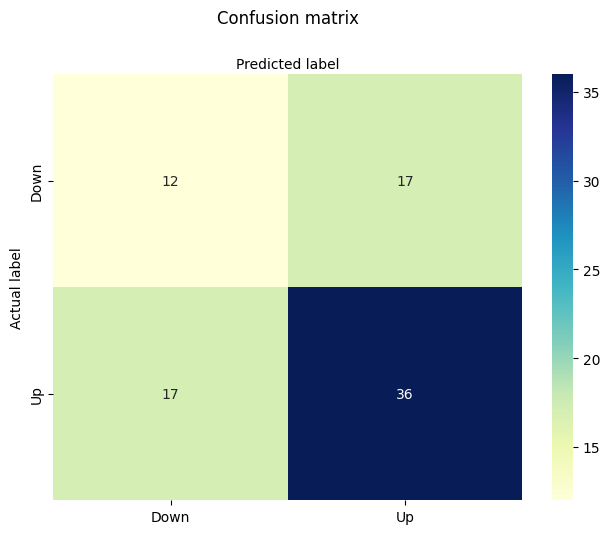

In [ ]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

clf = SVC(kernel='rbf', C=1000, gamma=.01)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_val_pca)

# Get confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

# Find accuracy, precision, recall and F1 score
accuracy = metrics.accuracy_score(y_val, y_pred)
precision = metrics.precision_score(y_val, y_pred, pos_label=1)
recall = metrics.recall_score(y_val, y_pred, pos_label=1)
f1 = (2*precision*recall)/(precision+recall) if (precision+recall) != 0 else 0

# Display the metrics
print("\nK = 6")
print("Confusion matrix:\n", cnf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Confusion matrix using heatmap
class_names = ['Down', 'Up']
fig, ax = plt.subplots()
# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Replace the x-axis and y-axis labels
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)